# Extract data at the intersection of a horizon and 3D volume

In [1]:
%load_ext autoreload
%autoreload 2

from os import path

## Load Small 3D Volume from Volve

In [2]:
volve_3d_path = path.join("..", "data", "volve10r12-full-twt-sub3d.sgy")
print("3D", volve_3d_path, path.exists(volve_3d_path))

3D ../data/volve10r12-full-twt-sub3d.sgy True


In [4]:
from segysak.segy import segy_loader, get_segy_texthead, segy_header_scan, segy_header_scrape

In [5]:
get_segy_texthead(volve_3d_path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
C 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [7]:
from segysak.segy import well_known_byte_locs

volve_3d = segy_loader(volve_3d_path, **well_known_byte_locs("petrel_3d"))
volve_3d.data


Fast direction is CDP


<xarray.DataArray 'data' (iline: 61, xline: 202, twt: 850)>
array([[[ 2.05745399e-02,  2.20407024e-02,  1.96589418e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.23256370e-02,  1.59417503e-02,  1.38800517e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.63372169e-05,  4.92771342e-03,  3.24293785e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.47898412e-02,  5.22681139e-02,  5.00054434e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.27492070e-02,  6.00568764e-02,  5.75365834e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.91987872e-02,  6.67222738e-02,  6.40410781e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-3.46487835e-02, -3.38801444e-02, -3.20093483e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-4.10056897e-02, -4.02579159e-02, -3.83855253e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.01492284e-02, -4.94211540e-02, -4.75146063e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.67428097e-02,  5.52131385e-02,  5.07290289e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.64809942e-02,  6.48384690e-02,  6.00756221e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.48873353e-02,  7.32158422e-02,  6.82448149e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-9.64066982e-02, -9.07384753e-02, -9.37667489e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.04108036e-01, -9.81314182e-02, -1.01393223e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.13099337e-01, -1.06950760e-01, -1.10372961e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.40114716e-02,  5.10329828e-02,  4.78516594e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.48291111e-02,  6.16531037e-02,  5.82096726e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.29467869e-02,  6.98981881e-02,  6.60549402e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       ...,

       [[ 9.68695153e-04, -2.51687597e-04,  1.44266407e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.63413770e-03, -2.75512878e-03, -1.06797647e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-4.35291976e-03, -5.47245145e-03, -3.75785050e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-1.80308372e-02, -1.90376081e-02, -1.74372271e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.87230855e-02, -1.95240490e-02, -1.79770775e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.83046348e-02, -1.88191719e-02, -1.74503252e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 8.91474541e-04,  1.06899254e-03,  1.12220901e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.47480323e-04, -7.20057171e-04, -5.74156409e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.25873315e-03, -1.95197086e-03, -1.81181263e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-8.93678516e-03, -8.87831673e-03, -8.82190093e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.89039040e-03, -9.03325155e-03, -8.77474993e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.80905986e-03, -9.18869302e-03, -8.81006569e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 2.17335932e-02,  1.93170868e-02,  2.07530260e-02, ...,
       

## Load up horizon data

In [9]:
top_hugin_path = path.join("..", "data", "hor_twt_hugin_fm_top.dat")
print("Top Hugin", top_hugin_path, path.exists(top_hugin_path))

Top Hugin ../data/hor_twt_hugin_fm_top.dat True


In [14]:
import pandas as pd

top_hugin_df = pd.read_csv(top_hugin_path, names=["cdp_x","cdp_y","twt"], sep=' ')
top_hugin_df.head()

,cdp_x,cdp_y,twt
0,432186.713151,6.477029e+06,2776.275147
1,432189.737524,6.477041e+06,2779.657715
2,432192.761898,6.477053e+06,2780.465088
3,432195.786271,6.477066e+06,2780.949951
4,432198.810645,6.477078e+06,2781.769775


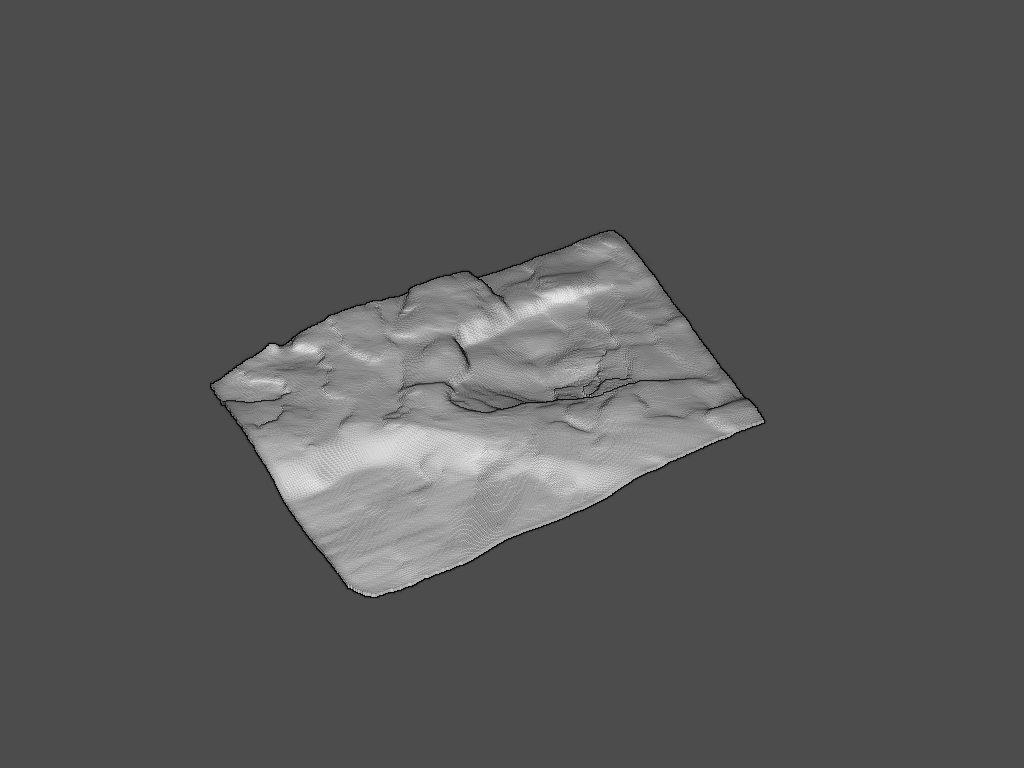

In [21]:
import pyvista as pv

point_cloud = pv.PolyData(top_hugin_df.to_numpy())
point_cloud.plot(eye_dome_lighting=True)